# Выявление профилей потребления

Менеджеры продукта, отвечающие за пользовательский опыт, интернет-магазина товаров для дома и быта «Пока все ещё тут» наняли аналитика для сегментирования их покупателей по профилю потребления. Необходимо провести исследовательский анализ данных для разработки персонализированных предложений для покупателей интернет-магазина. Для этого необходимо проанализировать их покупки и сегментировать покупателей на основе их заказов. 

Для проверки  аналитик **сформировал гипотезу**, что приоритетный сегмент покупателей - который совершает частые покупки, а не сегмент покупателей с дорогими покупками. На первый сегмент необходимо обратить наибольшее внимания для увеличения выручки интернет-магазина.\
**Вторая гипотеза**, что выделенные сегменты покупателей статистически отличаются друг от друга и сегментация выполнена корректно.\
Необходимо проверить гипотезы и проанализировать результаты. 

По итогам исследования необходимо подготовить **презентацию и дашборд**.\
На дашборде будет отображена следующая информация (набор №2):
1. Диаграмма, отображающая сумму покупок по дням.
2. Гистограмма, отображающая распределение заказов по сумме.
3. Необходимо добавить фильтр дашборда по дате совершения покупки.

**Оглавление**
1. [Открытие и изучение данных](#start)
2. [Предобработка данных](#preprocessing)
    * [Обработка дубликатов](#duplicates)
    * [Проверка на аномальные значений](#abnormal)
    * [Изменение типа данных времени](#data_type)
    * [Добавление столбцов:](#columns) 
       * [Выручка по позиции](#columns1)
       * [Категоризация товара](#columns2)
       * [Время, день, месяц покупки](#columns3)
3. [Анализ данных](#analysis)
    * [Данные за какой период исследования представлены](#analysis1)
    * [Количество покупателей интернет-магазина](#analysis2)
    * [Количество заказов в интернет-магазине](#analysis3)
    * [Количество продаж](#analysis4)
       * [По времени суток](#analysis4_1)
       * [По дню недели](#analysis4_2)
       * [По месяцам](#canalysis4_3)
4. [Детализация исследования: сегментация покупателей](#detailed)
    * [Лучшие покупатели по всем показателям](#detailed1)
    * [Покупатели на пороге оттока](#detailed2)
    * [Разовые покупатели](#detailed3)
    * [Постоянные покупатели](#detailed4)
5. [Формулировка и проверка гипотез](#hypotheses)
    * [Средняя выручка на покупателя с высокой денежной ценностью различается с остальными покупателями](#hypotheses1)
    * [Средняя частота заказов на покупателя на покупателя с высоким количеством заказов различается с остальными покупателями](#hypotheses2)
6. [Вывод](#conclusions)

## Открытие и изучение данных
<a id="start"></a> 

In [1]:
#импортируем библиотеку pandas, matplotlib, datetime, seaborn, numpy, scipy.stats, math, scipy, graph_objects, plotly
import pandas as pd
import plotly.express as px
from plotly import graph_objects as go
from datetime import datetime, timedelta
import scipy.stats as stats
import seaborn as sns
import numpy as np
import math as mth
from scipy import stats as st
from matplotlib import pyplot as plt
from folium import Marker, Map, Choropleth
from folium.plugins import MarkerCluster
import json
%matplotlib inline

In [2]:
#укажем два пути к файлу в случае ошибки 
try:
    data = pd.read_csv('/ecom_dataset_upd.csv') 
except:
    google_id = "1DkqEQWZoHh22YrsYcNUxSzlhgFqdl0tf"
    data = pd.read_csv(f"https://drive.google.com/uc?export=download&id={google_id}" )    

In [3]:
#  отображение всех столбцов полностью
pd.set_option('display.max_colwidth', 0)

In [4]:
#выведем первые 5 строчек датасета на экран 
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


В датасете представлена информация о покупках из интернет-магазина товаров для дома и быта «Пока все ещё тут», отображающая дату заказа, идентификатор покупателя, идентификатор заказа, наименование товара, количество товара в заказе и цену товара.

In [5]:
#выведем основную информацию с помощью метода info()
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


В датасете представлено 7474 транзакций.\
В датасете нет пропусков, названия столбцов соответствуют стилю.\
Тип данных необходимо изменить только в столбце дата заказа. Все остальные типы данных в столбцах соответствуют информации в них.

## Предобработка данных
<a id="preprocessing"></a> 

### Обработка дубликатов
<a id="duplicates"></a> 

In [6]:
# сделаем все наименования товаров строчными
data['product'] = data['product'].str.lower()
# поменяем в наименованиях товаров букву 'ё' на 'е'
data['product'] = data['product'].replace('ё', 'е')

In [7]:
# поищем количество одинаковых строк
data.duplicated().sum()

0

Явных дубликатов в датафрейме нет.

### Проверка на аномальные значений 
<a id="abnormal"></a> 

- Проверим значения на аномальность, чтобы заказ `order_id` выполнялся одним уникальным пользователем `customer_id`.

In [8]:
# создадим список error_customer_id с номерами заказов, в котором у одного заказа несколько покупателей
error_customer_id = data.groupby('order_id', as_index=False)['customer_id'].nunique()\
    .query('customer_id > 1')['order_id'].tolist()

In [9]:
error_с = (data.shape[0] - data.query('order_id not in @error_customer_id').shape[0]) / data.shape[0]
'Число уникальных заказов с разными пользователями - {0:.1%}'.format(error_с)

'Число уникальных заказов с разными пользователями - 1.2%'

In [10]:
# удалим из датафрейма заказы с несколькими покупателями, их количество около 1% датасета
data = data.query('order_id not in @error_customer_id')

- Вторая проверка на аномальные значение - чтобы заказ `order_id` выполнялся в одну дату `date`.

In [11]:
# создадим список error_date с номерами заказов, в котором у одного заказа несколько дат покупок
error_date = data.groupby('order_id', as_index=False)['date'].nunique()\
    .query('date > 1')['order_id'].tolist()

In [12]:
error_d = (data.shape[0] - data.query('order_id not in @error_date').shape[0]) / data.shape[0]
'Число уникальных заказов с разными датами - {0:.1%}'.format(error_d)

'Число уникальных заказов с разными датами - 32.3%'

Практически треть датасета содержит аномальные значения. Здесь возможно два варианта:
- это ошибка выгрузки, значения действительно неверны, но проверить наверняка мы не можем, как и удалить эти значения из-за большого количества.
- другой вариант, что это разные заказы, но под одним номером (ошибочно не были присвоены новые номера), а покупатели, совершающие их - постоянные покупатели, в разные даты совершающие одни и те же покупки.\
Без уточнения у заказчика я склоняюсь ко второму варианту.

### Изменение типа данных времени
<a id="data_type"></a> 

In [13]:
# преобразуем данные о времени
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')

Преобразовали столбец `date` в формат даты и часа.

### Добавление столбцов:
<a id="columns"></a> 
#### Сумма по транзакции
<a id="columns1"></a> 

In [14]:
# добавим столбец сумма по одной транзакции
data['revenue'] = data['quantity'] * data['price']

#### Категоризация товара
<a id="columns2"></a> 

Для понимания покупательской способности и предпочтений разделим товары на категории по их наименованию.

In [15]:
# создадим таблицу product, разделив методом split наименование товара 
product = data['product'].str.split(' ', 10, expand=True)
# отображение строки длиною в 100
pd.set_option('max_rows', 100)
# подсчитаем наиболее часто всречающиеся название товаров
product[0].value_counts().head()

рассада          1418
пеларгония       818 
сумка-тележка    358 
сушилка          332 
муляж            212 
Name: 0, dtype: int64

In [16]:
# создадим словарь категорий товаров 
category_products = {'рассада':['рассада', 'томат', 'однолетн', 'арбуз', 'базилик', 'многолетн', 'огурец', 'клубника',
                                'капуст', 'тимьян', 'мята', 'дыня', 'помидор', 'зелен', 'патиссон', 'садов', 'тыкв', 'яблок',
                               'петрушка'],
                    'комнатные растения и цветы':['пеларгония', 'петуния', 'цветок', 'фуксия', 'алиссум', 'камнеломка',
                                                  'герань', 'калибрахоа', 'бакопа', 'тагетис', 'роза', 'вербена', 'космея',
                                                 'портулак', 'бальзамин', 'газания', 'вербейник', 'колокольчик', 'комнатн',
                                                 'гвоздика', 'виола', 'пуансеттия', 'антуриум', 'циперус', 'цикламен',
                                                 'бегония', 'фиалка', 'эвкалипт', 'фуксия', 'декабрист', 'флокс', 'примула',
                                                 'лобелия', 'кашпо', 'лаванда', 'эхеверия', 'калла', 'хлорофитум', 
                                                  'хризантема', 'настурция', 'барвинок', 'спатифиллум', 'мирт', 'лавр',
                                                 'азалия', 'котовник', 'калатея', 'афеляндра', 'нивянник', 'дендробиум',
                                                  'фаленопсис', 'розмарин', 'шеффлера', 'горш', 'цинния', 'седум',
                                                 'гардения', 'чабер', 'незабудка', 'лапчатка'],
                    'кухня':['кружка', 'тарелка', 'салатник', 'банка', 'нож', 'сковород', 'кастрюля', 'весы', 
                             'термокружка', 'чайник', 'доска', 'обед', 'крышк', 'выпечк', 'ложка', 'вилка', 'овсянница',
                             'чайн', 'блюдо', 'хлебница', 'терка', 'овощеварка', 'фужер', 'кофе', 'миксер', 'блюдце',
                            'миска', 'веник', 'емкость'],
                    'декор':['штора', 'муляж', 'коврик', 'чехол', 'искусственн', 'ковер', 'салфетка', 'скатерть', 'новогодн',
                             'декоративн', 'плед', 'покрывал', 'матрас'],
                    'ванная комната':['сушилка', 'гладильн', 'таз', 'швабра', 'ёрш', 'щетка-сметка', 'термометр', 'щетка',
                                      'ванн', 'мыло', 'полотенц', 'белья', 'зуб', 'тряпк'],
                    'хранение':['вешал', 'корзина', 'полки', 'плечики', 'кофр', 'крючок', 'вешалка-плечики', 'контейнер'],
                    'хозяйственные товары':['сумка-тележка', 'тележка', 'лестница-стремянка', 'стремянк', 'корыто',
                                            'окномойка', 'подрукавник', 'перчатки', 'ведро', 'сумка', 'карниз', 'хозяйственн',
                                           'багаж', 'подставк', 'ящик', 'стяжк', 'петл', 'вантуз']}

In [17]:
# создадим функцию, которая будет принимать строку row
def category(row):
# с помощью метода split разделим строку на отдельные элементы
    items = row.split(' ')
# товар без категории обозначим 'без категории'   
    category = 'без категории'
    
    for i in range(len(items)):
        if category != 'без категории':
            break
        for key in category_products:
            if category != 'без категории':
                break
            for k in range(len(category_products[key])):
                item = items[i].strip()
                temp = category_products[key][k]
        
                if temp in item:
                    category = key
                    break
                  
               
    return category    

In [18]:
# применим функцию к столбцу product
data['category_products'] = data['product'].apply(category)

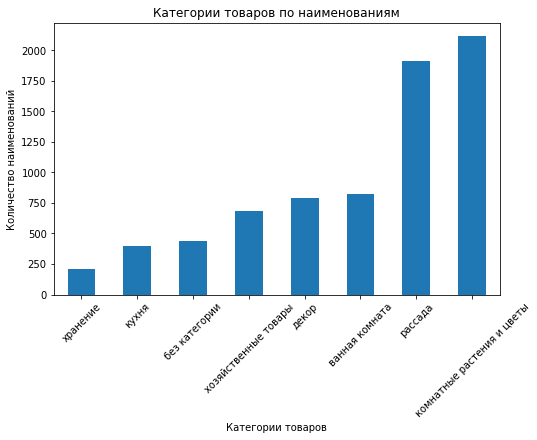

In [19]:
# подсчитаем количество наименований в каждой категории
data.groupby('category_products')['category_products'].count().sort_values(ascending=True)\
    .plot(kind='bar', figsize=(8, 5), legend=False)
plt.title('Категории товаров по наименованиям')
plt.xlabel('Категории товаров')
plt.ylabel('Количество наименований')
plt.xticks(rotation=45)
plt.show()

В разрезе количества наименований по категориям большая часть покупаемых товаров представлена категориями `комнатные растения и цветы` и `рассада` - больше 2000 наименований.

#### Время, день, месяц покупки
<a id="columns3"></a>

In [20]:
# добавим столбцы времени, дня недели и месяца покупки для анализа
data['hour'] = data['date'].dt.hour
data['weekday'] = data['date'].dt.weekday
data['month'] = data['date'].dt.month

## Анализ данных:
<a id="analysis"></a> 

### Данные за какой период исследования представлены
<a id="analysis1"></a> 

In [21]:
# найдем максимальную и минимальную дату событий
display(min(data['date']))
max(data['date'])

Timestamp('2018-10-01 00:00:00')

Timestamp('2020-01-31 15:00:00')

Мы располагаем данными с **12 часов ночи 1 октября 2018 года по 15 часов дня 31 января 2020 года**.

### Количество покупателей интернет-магазина
<a id="analysis2"></a>

In [22]:
uniq_customer = data['customer_id'].nunique()
f'Общее количество уникальных покупателей интернет-магазина - {uniq_customer} покупателей.'

'Общее количество уникальных покупателей интернет-магазина - 2413 покупателей.'

### Количество заказов в интернет-магазине
<a id="analysis3"></a>

In [23]:
uniq_order = data['order_id'].nunique()
f'Количество заказов в интернет-магазине - {uniq_order} заказов.'

'Количество заказов в интернет-магазине - 3492 заказов.'

### Количество продаж
<a id="analysis4"></a> 

Проанализируем, в какое время дня, в какой день недели и месяц покупатели делают самое большое количество покупок. Так как данные представлены за полтора года, в разрезе годов делать анализ не будем.

#### По времени суток
<a id="analysis4_1"></a>

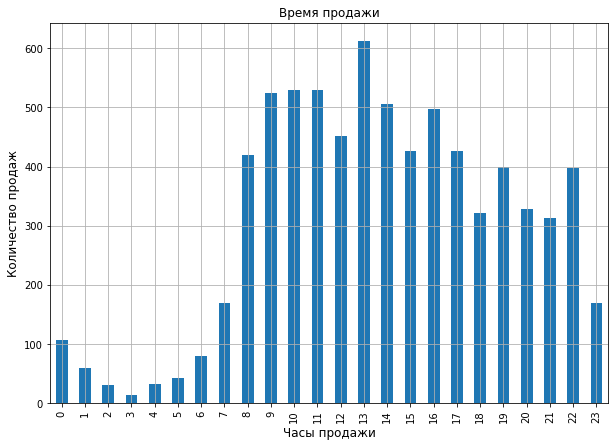

In [24]:
# сгруппируем данные по времени и количеству продаж
data.groupby('hour')['revenue'].count()\
    .plot(kind='bar', figsize=(10,7), grid=True)
# оформим график
plt.title('Время продажи')
plt.xlabel('Часы продажи', fontsize=12)
plt.ylabel('Количество продаж', fontsize=12)
plt.show()

Количество продаж в течение дня распределяется следующим образом.\
Самое большое количество продаж совершается с 8 утра до 22 вечера и достигает пика к часу дня, ночью с 23-00 до 7-00 покупательская активность падает.

#### По дню недели
<a id="analysis4_2"></a>

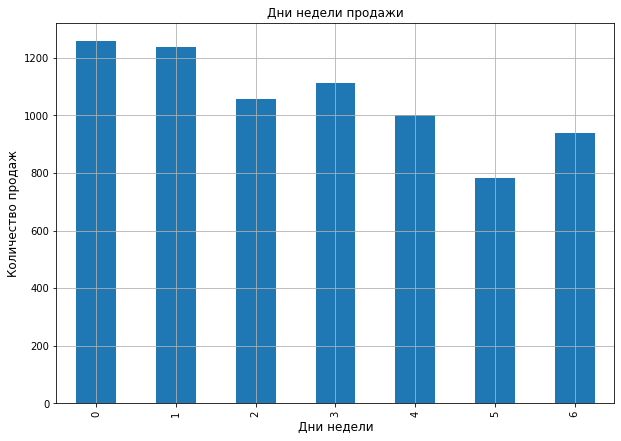

In [25]:
# сгруппируем данные по дню недели и количеству продаж
data.groupby('weekday')['revenue'].count()\
    .plot(kind='bar', figsize=(10,7), grid=True)
plt.title('Дни недели продажи')
plt.xlabel('Дни недели', fontsize=12)
plt.ylabel('Количество продаж', fontsize=12)
plt.show()

Количество продаж по дням недели распределяется следующим образом.\
Самое большое количество покупок совершается в понедельник и во вторник, а в выходные дни наблюдаются самые низкие продажи.\
Это может быть связано с тем, что ассортимент товаров представлен в рассадой, цветами и мелкими хозяйственными товарами, основная целевая аудитория данного магазина - это дачники, которые в выходные дни проводят время за городом и делают покупки по будним дням.

#### По месяцам
<a id="analysis4_3"></a>
Проверим количество продаж на сезонность, добавив на график категории товаров.

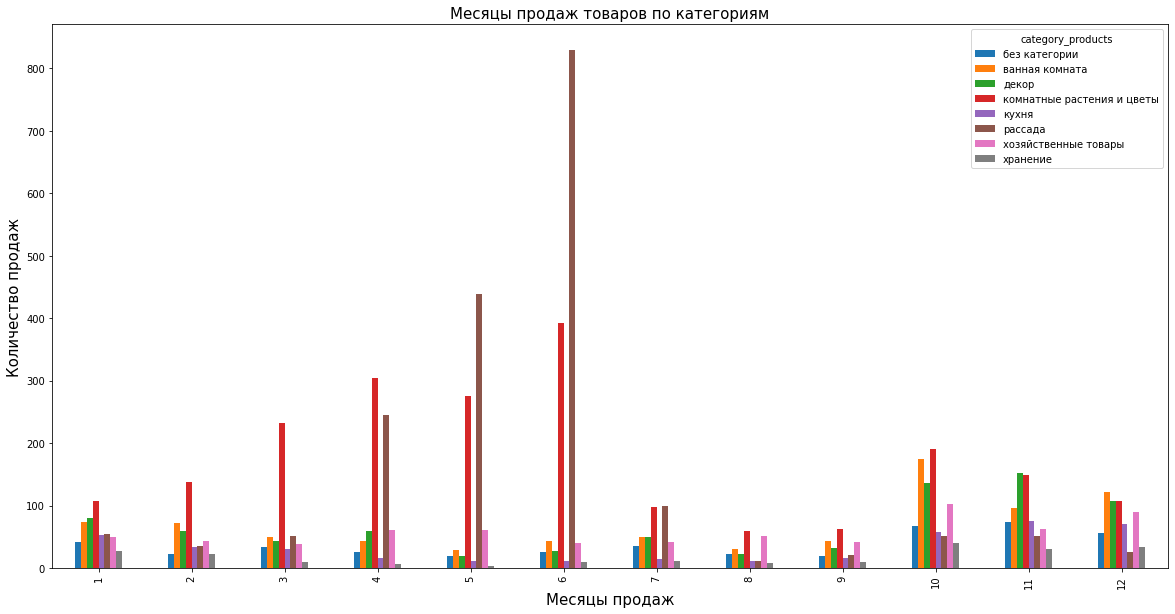

In [26]:
# составим сводную таблицу по месяцу, категориям и количеству продаж
data.pivot_table(index='month', columns='category_products', values='revenue', aggfunc='count')\
    .plot(kind='bar', figsize=(20, 10))
plt.title('Месяцы продаж товаров по категориям', fontsize=15)
plt.xlabel('Месяцы продаж', fontsize=15)
plt.ylabel('Количество продаж', fontsize=15)
plt.show()

У магазина ярко представлена сезонность продаж:
- категорию комнатные растения и цветы активно покупают с марта по июнь;
- категорию рассада покупают с апреля по июнь;
- июль - сентябрь самые низкие продажи по всем категориям;
- с октября подъем продаж по всем категорием с постепенным спадом к январю.\
Проведенный анализ по сезонности продаж подтверждает тот факт, что основная категория покупателей - дачники, закупающие цветы и рассаду с марта по июнь для посадки, июль-сентябрь проводят за городом и возвращаются в город к октябрю.
    

## Детализация исследования: сегментация покупателей
<a id="detailed"></a> 

Для сегментации покупателей используем **RFM-анализ потребительской ценности**.\
Он группирует покупателей на основе истории их транзакций:\
`Recency (Давность)` — Как давно покупатель совершил покупку?\
`Frequency (Частота)` — Как часто он совершает покупки?\
`Monetary Value (Денежная ценность)` — Сколько он тратит?\
Объединим и сгруппируем покупателей в различные сегменты и упорядочим от наиболее ценных (наибольшая повторяемость, частота и ценность) до наименее ценных (наименьшая повторяемость, частота и ценность). 

In [27]:
# удалим из датафрейма заказы с несколькими датами и аномальный заказ с 1000 позициями
rfm_data = data\
    .query('product != "вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000" & order_id not in @error_date')

Для RFM-анализа нам потребуются определенные данные о каждом из клиентов:

- ID клиента для их идентификации - `customer_id`;
- Давность (R) как количество дней с момента последней покупки - `date`;
- Частота (F) как общее количество транзакций - `order_id`;
- Деньги (М) как общая сумма потраченных денег - `revenue`.

In [28]:
# создадим датафрейм для rfm-анализа
rfm_data = rfm_data.groupby('customer_id').agg({'date': lambda x: (max(data['date']) - x.max()).days, # Recency
                                                'order_id': lambda x: len(x.unique()), # Frequency
                                                'revenue': lambda x: x.sum()})    # Monetary

In [29]:
# переименуем столбцы
rfm_data.rename(columns={'date': 'recency', 
                         'order_id': 'frequency',
                         'revenue': 'monetary_value'}, inplace=True)

In [30]:
# выведем полученную таблицу
rfm_data.head()

,recency,frequency,monetary_value
customer_id,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0
001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,108,1,914.0
002d4d3a-4a59-406b-86ec-c3314357e498,368,1,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,123,1,2324.0


In [31]:
# проверим информацию по таблице
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2184 entries, 000d6849-084e-4d9f-ac03-37174eaf60c4 to ffe82299-3f5b-4214-87fe-3d36ecccfac3
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         2184 non-null   int64  
 1   frequency       2184 non-null   int64  
 2   monetary_value  2184 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 68.2+ KB


Для RFM расчета используем квинтили — составление четырех равных частей на основе доступных значений.

In [32]:
quantiles = rfm_data.quantile(q = [0.25, 0.5, 0.75])
quantiles

,recency,frequency,monetary_value
0.25,65.0,1.0,400.50
0.50,190.5,1.0,843.75
0.75,338.0,2.0,1799.00


In [33]:
# преобразуем квантили в словарь
quantiles = quantiles.to_dict()
# создадим копию таблицы rfm_data
rfm_segment = rfm_data.copy()

# создадим функцию r_class для упорядочивания давности (r) по сегментам (от 4 по 1, чем меньше давность, тем лучше) 
# аргументы (x = значение, p = давность, d = квантили)
def r_class(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# создадим функцию fm_class для упорядочивания частоты и денежного значения (f и m) по сегментам 
# (от 1 по 4, чем больше частота и денежное значение, тем лучше) 
# аргументы (x = значение, p = частота или денежное значение, d = квантили)
def fm_class(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# создадим столбцы по каждому сегменту и общий столбец rfm_class для общего рейтинга    
rfm_segment['r_quartile'] = rfm_segment['recency'].apply(r_class, args=('recency',quantiles,))
rfm_segment['f_quartile'] = rfm_segment['frequency'].apply(fm_class, args=('frequency',quantiles,))
rfm_segment['m_quartile'] = rfm_segment['monetary_value'].apply(fm_class, args=('monetary_value',quantiles,))
rfm_segment['rfm_class'] = rfm_segment.r_quartile.map(str) \
                            + rfm_segment.f_quartile.map(str) \
                            + rfm_segment.m_quartile.map(str)

In [34]:
# выведем полученную таблицу
rfm_segment.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_class
customer_id,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0,3,1,2,312
001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0,1,1,2,112
00299f34-5385-4d13-9aea-c80b81658e1b,108,1,914.0,3,1,3,313
002d4d3a-4a59-406b-86ec-c3314357e498,368,1,1649.0,1,1,3,113
003bbd39-0000-41ff-b7f9-2ddaec152037,123,1,2324.0,3,1,4,314


### Лучшие покупатели по всем показателям
<a id="detailed1"></a> 

Это постоянные покупатели, которые часто и по несколько раз посещают магазин, делают крупные покупки.\
Покупателей сегмента 444 нет, поэтому для анализа возьмем также клиентов групп 344, 434, 443.

In [35]:
#rfm_class = 444, 344, 434, 443
best_customer = rfm_segment.query('rfm_class in ["444", "344", "434", "443"]').sort_values('monetary_value', ascending=False)
best_customer.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_class
customer_id,,,,,,,
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,92,16,21009.0,3,4,4,344
f279d50f-a508-40b4-bde5-5cb4a1be3ad0,31,2,16557.0,4,3,4,434
b7dffbd3-810c-4125-889a-454ee093eb73,8,2,10168.0,4,3,4,434
ac250053-a236-467a-97d2-ddbb9bf4a1ba,49,2,8684.0,4,3,4,434
b16a52b7-499b-4be8-9220-19076ed22bc9,43,2,8307.0,4,3,4,434


In [36]:
'Число лучших покупателей по всем критериям показателей - {}'.format(best_customer.shape[0])

'Число лучших покупателей по всем критериям показателей - 180'

Для данного сегмента можно на основе анализа их заказов делать персональные предложения или предложить гибкую систему скидок для увеличения суммы чека.

### Покупатели на пороге оттока
<a id="detailed2"></a> 

Это покупатели, которые делали крупные покупки и довольно часто посещали магазин, но давно в него не заходили.

In [37]:
low_r = rfm_segment.query('r_quartile <= 2').sort_values('monetary_value', ascending=False)
low_r.head(5)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_class
customer_id,,,,,,,
c971fb21-d54c-4134-938f-16b62ee86d3b,331,125,152028.0,2,4,4,244
4d93d3f6-8b24-403b-a74b-f5173e40d7db,464,34,53728.0,1,4,4,144
58a4c3cc-504f-43ea-a74a-bae19e665552,381,2,53232.0,1,3,4,134
146cd9bf-a95c-4afb-915b-5f6684b17444,234,1,49432.0,2,1,4,214
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,286,4,41900.0,2,4,4,244


In [38]:
'Число покупателей на пороге оттока - {}'.format(low_r.shape[0])

'Число покупателей на пороге оттока - 1092'

На пороге оттока половина проанализованных покупателей, достаточно большой показатель. Возможно, они переехали, сменили магазин на более выгодный или продали дачу.\
Для таких покупателей можно предложить сделать рассылку или персональную скидку для того, чтобы они вновь вернулись.

### Разовые покупатели
<a id="detailed3"></a> 

Тип покупателей, которые давно сделали один недорогой заказ в магазине.

In [39]:
one_customer = rfm_segment.query('rfm_class =="111"').sort_values('recency',ascending=False)
one_customer.head(5)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_class
customer_id,,,,,,,
32a85453-f14d-40c2-90ba-3851498a5f3b,486,1,374.0,1,1,1,111
f08d9018-438e-4e96-b519-f74c0302a433,486,1,359.0,1,1,1,111
5f75c73a-1305-4079-b040-2bcb42085002,485,1,299.0,1,1,1,111
eee7b1fa-ba81-4049-add6-370ee5e62e72,485,1,187.0,1,1,1,111
29a514f5-a27e-4939-85d5-874a0c3f7a2c,485,1,193.0,1,1,1,111


In [40]:
'Число разовых покупателей - {}'.format(one_customer.shape[0])

'Число разовых покупателей - 138'

Единственная категория покупателей, для которых можно не делать персонализированное предложение.

### Постоянные покупатели
<a id="detailed4"></a> 

Сегмент покупателей, чаще всего делающие заказы.

In [41]:
high_f = rfm_segment.query('f_quartile > 3').sort_values('monetary_value', ascending=False)
high_f.head(5)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_class
customer_id,,,,,,,
c971fb21-d54c-4134-938f-16b62ee86d3b,331,125,152028.0,2,4,4,244
4d93d3f6-8b24-403b-a74b-f5173e40d7db,464,34,53728.0,1,4,4,144
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,286,4,41900.0,2,4,4,244
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,92,16,21009.0,3,4,4,344
639c4989-b0ab-412a-b7ec-be394cb2d372,451,3,12095.0,1,4,4,144


In [42]:
'Число постоянных покупателей - {}'.format(high_f.shape[0])

'Число постоянных покупателей - 26'

Таких покупателей не так много, можно предложить гибкую систему скидок для увеличения суммы чека.

## Формулировка и проверка гипотез
<a id="hypotheses"></a> 

Проверим, что предложенная сегментация имеет смысл с точки зрения бизнеса.\
Проверим продуктовые гипотезы о том, что средняя выручка и частота заказов на покупателя различается между сегментами.

### Средняя выручка на покупателя с высокой денежной ценностью различается с остальными покупателями
<a id="hypotheses1"></a> 

Проверка гипотезы: Средняя выручка на покупателя с высокой денежной ценностью различается с остальными покупателями.

**H_0**: Выручка (monetary_value) на покупателя с m > 2 = выручка (monetary_value) на покупателя с m <= 2.\
**H_a**: Выручка (monetary_value) на покупателя с m > 2 ≠ выручка (monetary_value) на покупателя с m <= 2.
alpha = 0.05

In [43]:
# поделим покупателей на группы, где high_m - покупатели с высокой денежной ценностью,
# а low_m - остальные покупатели
high_m = rfm_segment.query('m_quartile > 2').sort_values('monetary_value', ascending=False)
low_m = rfm_segment.query('m_quartile <= 2').sort_values('monetary_value', ascending=False)

In [44]:
# вызов метода для проверки гипотезы
results = st.ttest_ind(low_m['monetary_value'],\
                       high_m['monetary_value'], equal_var=False)
# значение уровня значимости
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 6.502878040242859e-40
Отвергаем нулевую гипотезу


### Средняя частота заказов на покупателя на покупателя с высоким количеством заказов различается с остальными покупателями
<a id="hypotheses2"></a> 

Проверка гипотезы: Средняя частота заказов на покупателя с высоким количеством заказов различается с остальными покупателями.

**H_0**: Средняя частота заказов (frequency) покупателей с высоким количеством заказов = Средняя частота заказов (frequency) остальных покупателей.\
**H_a**: Средняя частота заказов (frequency) покупателей с высоким количеством заказов ≠ средняя частота заказов (frequency) остальных покупателей.
alpha = 0.05

In [45]:
# поделим покупателей на группы, где high_f - покупатели с высоким количеством заказов,
# а low_f - остальные покупатели
high_f = rfm_segment.query('f_quartile > 2').sort_values('monetary_value', ascending=False)
low_f = rfm_segment.query('f_quartile <= 2').sort_values('monetary_value', ascending=False)

In [46]:
# вызов метода для проверки гипотезы
results = st.ttest_ind(low_f['frequency'],\
                       high_f['frequency'], equal_var=False)
# значение уровня значимости
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 8.008581127855814e-16
Отвергаем нулевую гипотезу


/tmp/ipykernel_31/686510602.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results = st.ttest_ind(low_f['frequency'],\


Продуктовые гипотезы о том, что средняя выручка и частота заказов на покупателя различается между сегментами, поделенными по признаку частота и денежная ценность, подтвердились при помощи статистических критериев. Предложенная сегментация имеет смысл с точки зрения бизнеса. 

## Вывод
<a id="conclusions"></a> 

Мы провели большую исследовательскую работу по сегментированию покупателей интернет-магазина товаров для дома и быта «Пока все ещё тут» по профилю потребления. При анализе данных датафрейма мы сделали промежуточные выводы, которые помогли лучше узнать потребителей и их покупательские способности.
- Во время анализа были проанализированы данные с 12 часов ночи 1 октября 2018 года по 15 часов дня 31 января 2020 года.
- Общее количество уникальных покупателей интернет-магазина - 2413 покупателей.
- Количество заказов в интернет-магазине - 3492 заказов.
- Количество продаж в течение дня:
  - самое большое количество продаж совершается с 8 утра до 22 вечера;
  - достигает пика к часу дня;
  - ночью с 23-00 до 7-00 покупательская активность падает.
- Количество продаж по дням недели:
  - самое большое количество покупок совершается в понедельник и во вторник;
  - в выходные дни наблюдаются самые низкие продажи.
- Количество продаж по месяцам подвержено сезонности:
  - категорию комнатные растения и цветы активно покупают с марта по июнь;
  - категорию рассада покупают с апреля по июнь;
  - июль - сентябрь самые низкие продажи по всем категориям;
  - с октября подъем продаж по всем категорием с постепенным спадом к январю.


Проведенный анализ выявил основную категорию покупателей магазина - дачники.\
Для заказчика был проведен RFM-анализ потребительской ценности для сегментации покупателей, который сгруппировал покупателей в различные сегменты и упорядочил их от наиболее ценных (наибольшая повторяемость, частота и ценность) до наименее ценных (наименьшая повторяемость, частота и ценность).\
На основе выделенных сегментов покупателей заказчик может разработать персонализированные предложения для каждого сегмента.